In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [5]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df_train = df_train.select_dtypes(exclude=['object'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [12]:
df_test = df_test.select_dtypes(exclude=['object'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1444 non-null   float64
 9   BsmtFinSF1     1458 non-null   float64
 10  BsmtFinSF2     1458 non-null   float64
 11  BsmtUnfSF      1458 non-null   float64
 12  TotalBsmtSF    1458 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1457 non-null   float64
 18  BsmtHalf

In [13]:
df_train.dropna(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   OverallQual    1121 non-null   int64  
 5   OverallCond    1121 non-null   int64  
 6   YearBuilt      1121 non-null   int64  
 7   YearRemodAdd   1121 non-null   int64  
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   int64  
 10  BsmtFinSF2     1121 non-null   int64  
 11  BsmtUnfSF      1121 non-null   int64  
 12  TotalBsmtSF    1121 non-null   int64  
 13  1stFlrSF       1121 non-null   int64  
 14  2ndFlrSF       1121 non-null   int64  
 15  LowQualFinSF   1121 non-null   int64  
 16  GrLivArea      1121 non-null   int64  
 17  BsmtFullBath   1121 non-null   int64  
 18  BsmtHalf

In [14]:
df_test.dropna(inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1146 non-null   int64  
 1   MSSubClass     1146 non-null   int64  
 2   LotFrontage    1146 non-null   float64
 3   LotArea        1146 non-null   int64  
 4   OverallQual    1146 non-null   int64  
 5   OverallCond    1146 non-null   int64  
 6   YearBuilt      1146 non-null   int64  
 7   YearRemodAdd   1146 non-null   int64  
 8   MasVnrArea     1146 non-null   float64
 9   BsmtFinSF1     1146 non-null   float64
 10  BsmtFinSF2     1146 non-null   float64
 11  BsmtUnfSF      1146 non-null   float64
 12  TotalBsmtSF    1146 non-null   float64
 13  1stFlrSF       1146 non-null   int64  
 14  2ndFlrSF       1146 non-null   int64  
 15  LowQualFinSF   1146 non-null   int64  
 16  GrLivArea      1146 non-null   int64  
 17  BsmtFullBath   1146 non-null   float64
 18  BsmtHalf

In [17]:
X = df_train.drop(['SalePrice'],axis=1)
y = df_train['SalePrice']

In [18]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
reg = LinearRegression().fit(X_train, y_train)

In [21]:
reg.score(X_train,y_train)

0.7930585828264956

In [20]:
reg.score(X_test, y_test)

0.8181709487313608

In [22]:
y_pred = reg.predict(df_test)

array([125112.10129771, -43207.86486531, 168521.20168147, ...,
        53533.78498713, 166827.3970727 , 252136.0311451 ])

In [95]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

Accuracy : 

In [96]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [98]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column].fillna(df[column].value_counts().index[0],inplace=True)

In [99]:
for column in df.columns:
  if df[column].dtype == 'int64' or df[column].dtype == 'float64':
    df[column].fillna(df[column].mean(),inplace=True)

In [100]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
le = LabelEncoder()

In [103]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = le.fit_transform(df[column])

In [104]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

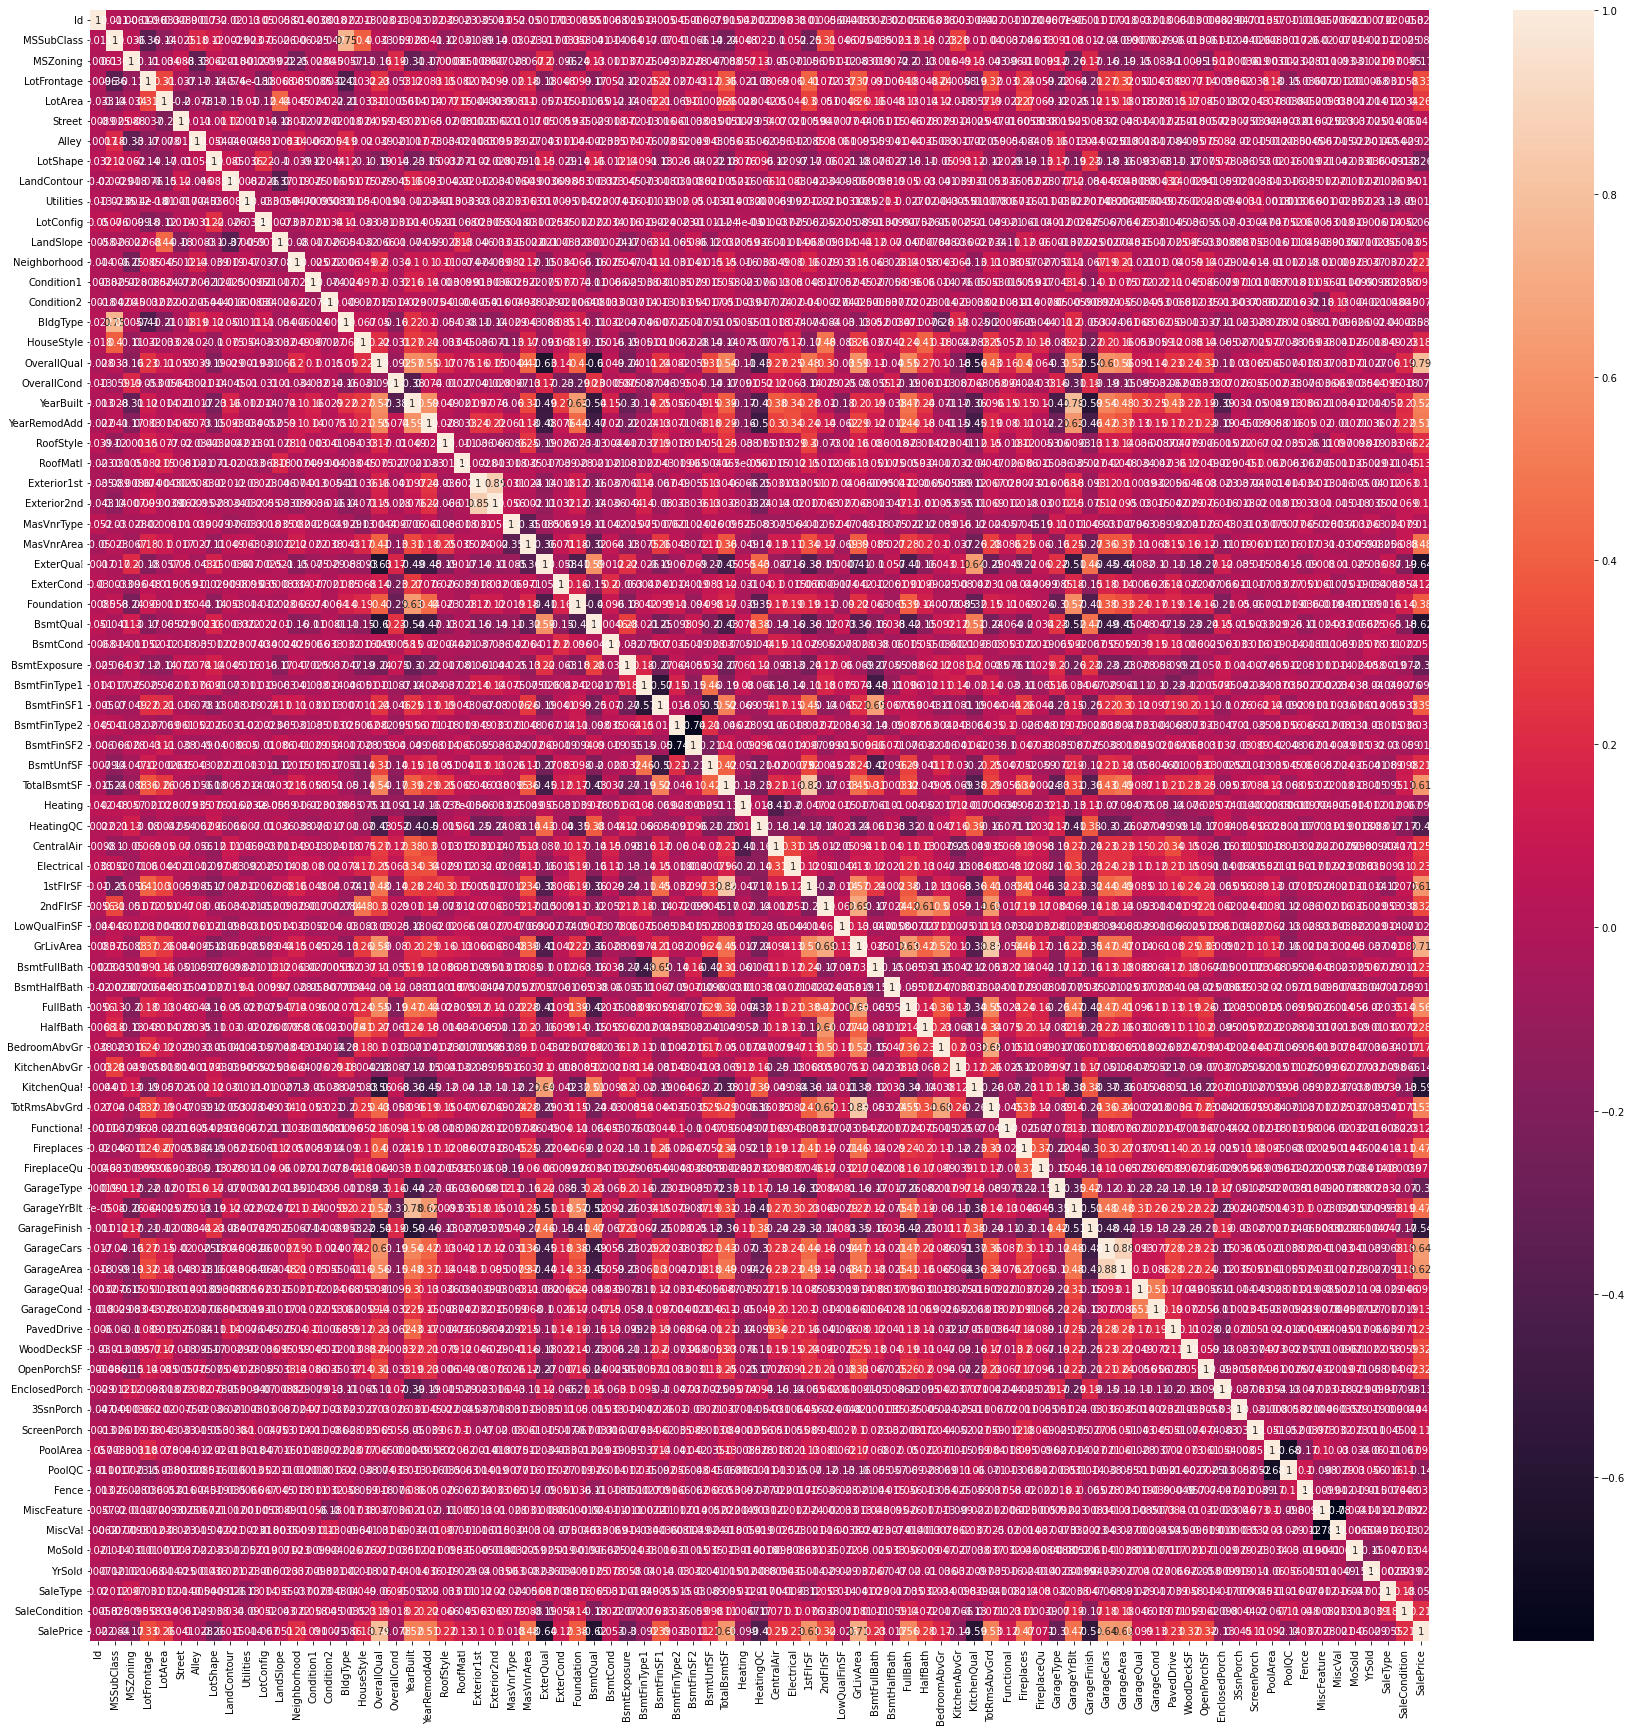

In [106]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True)

In [107]:
for col in range(len(corr['SalePrice'])):
        if abs(corr['SalePrice'][col]) < 0.2:
            df = df.drop([corr.index[col]], axis=1)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   LotShape       1460 non-null   int64  
 3   Neighborhood   1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   RoofStyle      1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   ExterQual      1460 non-null   int64  
 10  Foundation     1460 non-null   int64  
 11  BsmtQual       1460 non-null   int64  
 12  BsmtExposure   1460 non-null   int64  
 13  BsmtFinSF1     1460 non-null   int64  
 14  BsmtUnfSF      1460 non-null   int64  
 15  TotalBsmtSF    1460 non-null   int64  
 16  HeatingQC      1460 non-null   int64  
 17  CentralAir     1460 non-null   int64  
 18  Electric

In [109]:
X = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
restore = X.columns
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled)
X.columns = restore


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20,random_state=24)

In [122]:
new_reg = LinearRegression()

In [123]:
new_reg.fit(X_train,y_train)
new_reg.score(X_test,y_test)

0.82635995388188

In [129]:
max_acc = 0
state = 0
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20,random_state=i)
    new_reg.fit(X_train,y_train)
    score = new_reg.score(X_test,y_test)
    if score > max_acc:
        max_acc = score
        state = i
#     print(str(i) + " " + str(new_reg.score(X_test,y_test)))
print(max_acc,state)

0.9017471128035538 453


test

In [141]:
dft = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [142]:
for column in dft.columns:
  if dft[column].dtype == 'object':
    dft[column].fillna(dft[column].value_counts().index[0],inplace=True)

In [143]:
for column in dft.columns:
  if dft[column].dtype == 'int64' or dft[column].dtype == 'float64':
    dft[column].fillna(dft[column].mean(),inplace=True)

In [144]:
let = LabelEncoder()

In [145]:
for column in dft.columns:
  if dft[column].dtype == 'object':
    dft[column] = let.fit_transform(dft[column])

In [146]:
df.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'Neighborhood', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [138]:
cols = ['LotFrontage', 'LotArea', 'LotShape', 'Neighborhood', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'SaleCondition']

In [147]:
dft = dft[cols]

In [148]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1459 non-null   float64
 1   LotArea        1459 non-null   int64  
 2   LotShape       1459 non-null   int64  
 3   Neighborhood   1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   RoofStyle      1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   ExterQual      1459 non-null   int64  
 10  Foundation     1459 non-null   int64  
 11  BsmtQual       1459 non-null   int64  
 12  BsmtExposure   1459 non-null   int64  
 13  BsmtFinSF1     1459 non-null   float64
 14  BsmtUnfSF      1459 non-null   float64
 15  TotalBsmtSF    1459 non-null   float64
 16  HeatingQC      1459 non-null   int64  
 17  CentralAir     1459 non-null   int64  
 18  Electric

In [149]:
restore = dft.columns
scaler = StandardScaler()
scaled = scaler.fit_transform(dft)
dft = pd.DataFrame(scaled)
dft.columns = restore

In [150]:
preds = new_reg.predict(dft)

In [151]:
preds

array([ 97732.25152146, 169185.67345133, 174939.98055396, ...,
       148355.11074799, 112964.18755896, 231758.62630393])

In [152]:
dfid = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [153]:
df_sub = dfid[['Id']]
df_sub['SalePrice'] = preds
df_sub.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Id,SalePrice
0,1461,97732.251521
1,1462,169185.673451
2,1463,174939.980554
3,1464,187733.507490
4,1465,202131.456829


In [155]:
df_sub.to_csv('submission.csv', index=False)